<a href="https://colab.research.google.com/github/JuanDDiosRojas/Intro_Redes/blob/main/Clasificaci%C3%B3n_Keras_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a clasificar entre estrellas, cuásares y Galaxias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from math import floor
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

np.random.seed(10)


In [ ]:
def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1, será el porcentaje que mandará a entrenamiento
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

In [ ]:
estelares = pd.read_csv('https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv')

In [ ]:
estelares

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Este dataset cuenta con 10000 datos de observaciones astronómicas correspondientes a distintos cuerpos celestes: $\textbf{Galaxias}$,$\textbf{QSO}$ y $\textbf{Estrellas}$, nosotros trabajaremos con los siguientes parámetros:

#  ra
Que se refiere a la ascensión recta

# dec
La declinación

# Los ajustes a las coordenadas Thuan-Gunn u,g,r,i,z
Que se relacionan con las bandas de paso del objeto

# Los parámetros propios de la imágen
# run
Que representa la exploración específica realizada

# camcol
Del 1 al 6 cuantifica la búsqueda en el recorrido del objeto

# rerun
Indica cómo fue procesada la imagen

# field
va de 0 a 800(recorrido más largo) y cuantifica el recorrido

# Redshift

# plate
número de la bandeja, propia del espectroscopio utilizado

# mjd
Fecha juliana modificada en la que se tomó la foto

# fiberid
identifica las fibras del espectrógrafo

In [ ]:
datos=estelares.loc[:,'ra':'fiberid'];datos

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


##### Haremos los vectores one-hot como sigue:
[star, galaxy, qso]

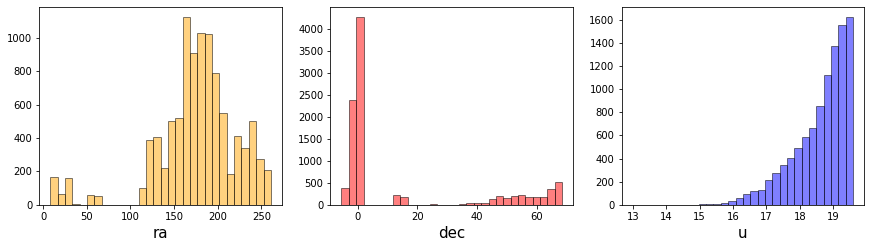

In [ ]:
  plt.figure(figsize=(20,8)) 

#ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

#ax1.hist(estelares.objid, bins=30, color='green',edgecolor='black', alpha=0.5)
#ax1.set_xlabel('onjid', size=15)

ax2.hist(estelares.ra, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('ra', size=15)

ax3.hist(estelares.dec, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('dec', size=15)

ax4.hist(estelares.u, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('u', size=15);

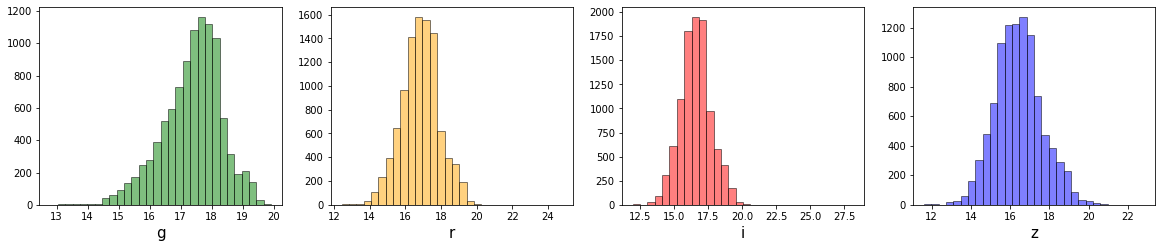

In [ ]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.g, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('g', size=15)

ax2.hist(estelares.r, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('r', size=15)

ax3.hist(estelares.i, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('i', size=15)

ax4.hist(estelares.z, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('z', size=15);

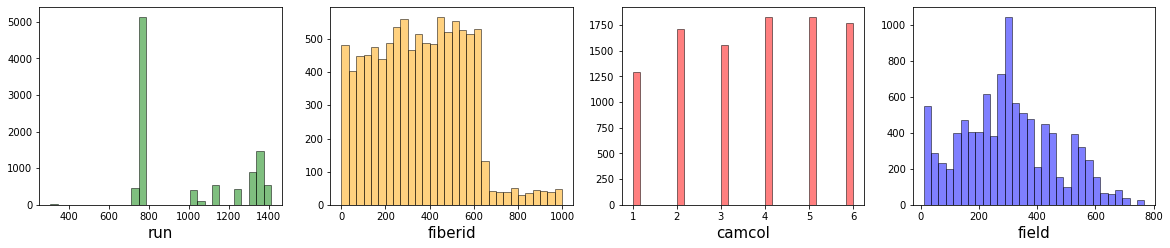

In [ ]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.run, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('run', size=15)

ax2.hist(estelares.fiberid, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('fiberid', size=15)

ax3.hist(estelares.camcol, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('camcol', size=15)

ax4.hist(estelares.field, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('field', size=15);

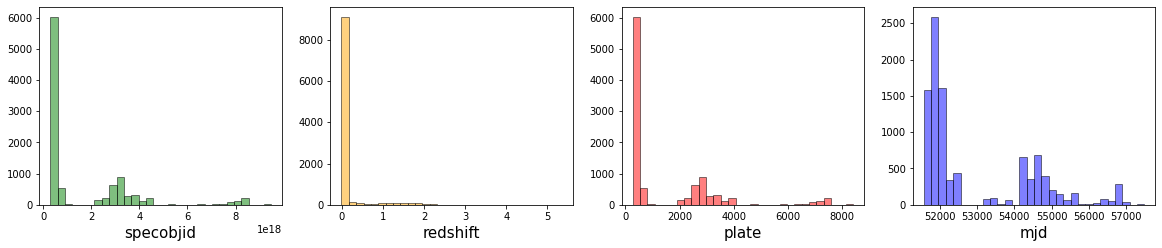

In [ ]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.specobjid, bins=30, color='green',edgecolor='black', alpha=0.5)
ax1.set_xlabel('specobjid', size=15)

ax2.hist(estelares.redshift, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('redshift', size=15)

ax3.hist(estelares.plate, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('plate', size=15)

ax4.hist(estelares.mjd, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax4.set_xlabel('mjd', size=15);

In [ ]:
clases=[]
for i in datos['class']:
    if i=='STAR': clases.append([1,0,0])
    if i=='GALAXY': clases.append([0,1,0])
    if i=='QSO': clases.append([0,0,1])
        
clases=np.array(clases);clases

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [14]:
galaxy = estelares[estelares["class"]=="GALAXY"]
star = estelares[estelares["class"]=="STAR"]
quasar = estelares[estelares["class"]=="QSO"]

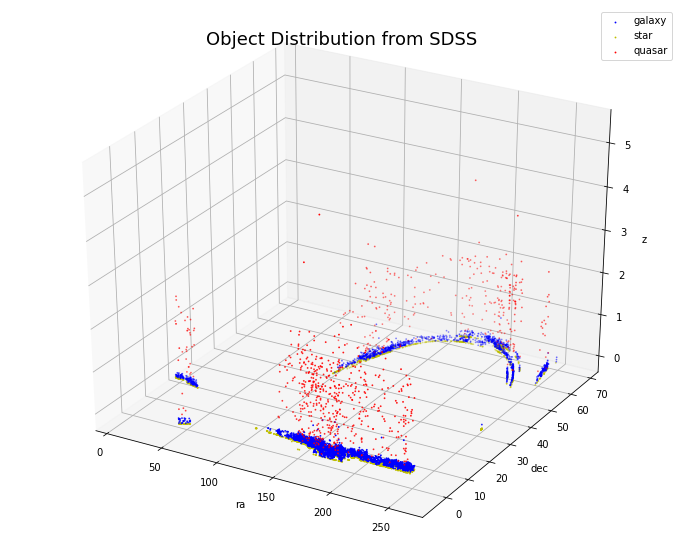

In [15]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7, color = 'b', label = 'galaxy')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y', label = 'star')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r', label = 'quasar')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Object Distribution from SDSS',fontsize=18)
plt.legend()
plt.show()

# Vamos prescindir de la variable cobjid y de rerun

In [16]:
datos=datos.drop({'class','rerun'}, axis=1)
datos

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


# Estandarizamos el conjunto

In [17]:
X=(datos-datos.mean())/datos.std()
X=np.array(X)

#### Aquí tenemos nuestro conjunto de datos:
X, clases
#### Vamos a separarlos en un conjunto para el modelo y en un conjunto para hacer predcciones 

In [18]:
X_modelo,Y_modelo,X_pred,Y_pred=split(X,clases,0.8)

In [19]:
clases.shape

(10000, 3)

In [42]:
nodos=150
split_size=0.8
taza=0.001
epocas=80

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X_modelo,Y_modelo,split_size)

#Armamos el modelo con estructura 'Sequential'
def architecture(batch_normalization, dropout):

  model=Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
  #capa 1
  model.add(Dense(nodos, input_shape=(15,),use_bias=1,activation='sigmoid'))
  #capa 2
  model.add(Dense(nodos,use_bias=1,activation='sigmoid'))
  # Passing it to a dense layer
  model.add(Flatten())
  if dropout:
        model.add(Dropout(0.5))
  #Add dropout 1
  if dropout:
        model.add(Dropout(0.5))
  if batch_normalization: 
        model.add(BatchNormalization())   
  #capa 3
  model.add(Dense(nodos,use_bias=1,activation='sigmoid'))
  #Add dropout2
  if dropout:
        model.add(Dropout(0.5))
  if batch_normalization: 
        model.add(BatchNormalization())   
  #capa4
  model.add(Dense(nodos,use_bias=1,activation='sigmoid'))

#para la capa de salida usamos Id como activación
  model.add(Dense(3,use_bias=1,activation='softmax'))
  return model
#loss_fn = losses.SparseCategoricalCrossentropy()


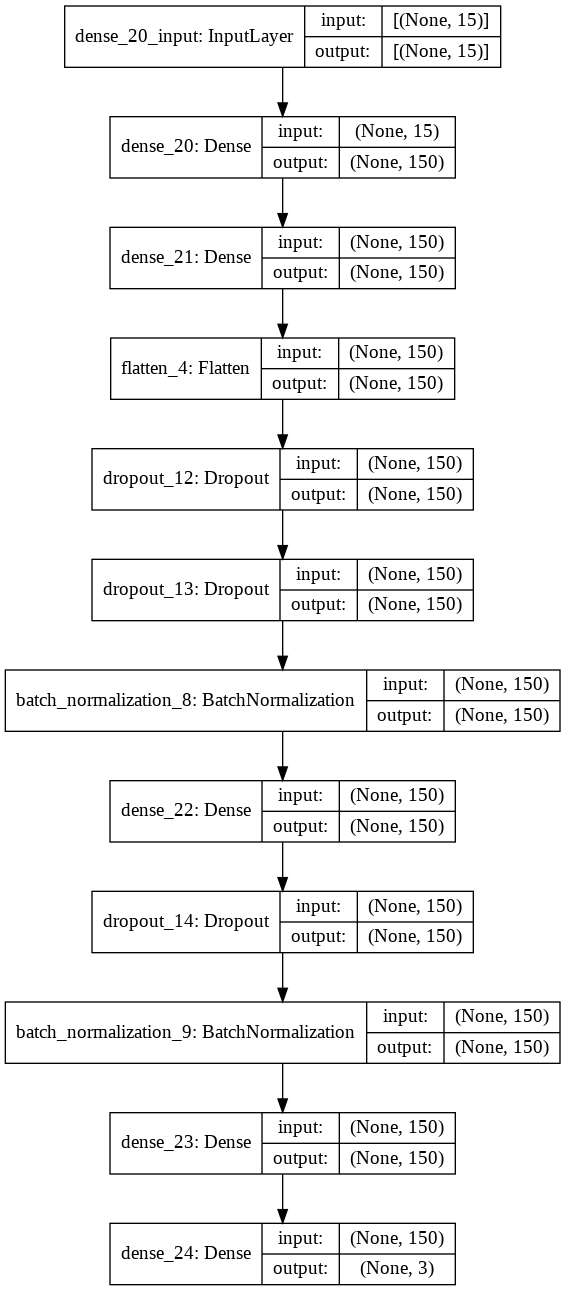

In [43]:
#Creamos el modelo con la función que definimos
batch_normalization=True
dropout=True

model = architecture(batch_normalization, dropout)
plot_model(model, show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

#model.summary()

In [44]:
#Lo compilamos
model.compile(RMSprop(learning_rate=taza),loss="categorical_crossentropy",
  metrics=['accuracy'])

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True)
#batch_size=512)

Epoch 1/80
200/200 [==============================] - 2s 4ms/step - loss: 0.7156 - accuracy: 0.6812 - val_loss: 0.4209 - val_accuracy: 0.8675
Epoch 2/80
200/200 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 0.8577 - val_loss: 0.2729 - val_accuracy: 0.9100
Epoch 3/80
200/200 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8766 - val_loss: 0.2445 - val_accuracy: 0.9156
Epoch 4/80
200/200 [==============================] - 1s 3ms/step - loss: 0.3138 - accuracy: 0.8884 - val_loss: 0.2343 - val_accuracy: 0.9162
Epoch 5/80
200/200 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.9009 - val_loss: 0.2033 - val_accuracy: 0.9281
Epoch 6/80
200/200 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9105 - val_loss: 0.1613 - val_accuracy: 0.9444
Epoch 7/80
200/200 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.9172 - val_loss: 0.1272 - val_accuracy: 0.9606
Epoch 

Text(0.5, 1.0, 'Error durante el entrenamiento')

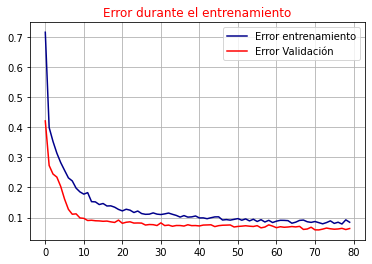

In [49]:
#Graficamos los resultados
error=history.history['loss']
exac=history.history['val_loss']
 
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

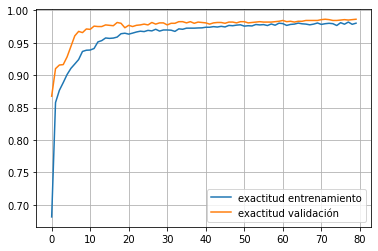

In [50]:
plt.plot(history.history['accuracy'],label='exactitud entrenamiento')
plt.plot(history.history['val_accuracy'],label='exactitud validación')
plt.legend()
plt.grid()

In [47]:
model.predict(X)

array([[9.9673921e-01, 3.2513433e-03, 9.4467459e-06],
       [9.9617261e-01, 3.8188051e-03, 8.5967986e-06],
       [6.5996224e-05, 9.9716175e-01, 2.7723606e-03],
       ...,
       [9.9561274e-01, 4.3586907e-03, 2.8617476e-05],
       [7.8219481e-02, 9.2136860e-01, 4.1185325e-04],
       [4.9808277e-05, 9.9775583e-01, 2.1943699e-03]], dtype=float32)

##### Ahora vamos a probar con el conjunto que reservamos para hacer predicciones

In [48]:
predicciones=model.predict(X_pred)
#Ahora tomamos la máxima probabilidad de cada sample y lo llevamos a la forma one-hot
#for j in predicciones:
    #j[np.argmax(j)]=1
    #j[j<1]=0
#Y por último veamos cuántos acertó comparando predicciones con Y_pred
s=0
for i in range(len(Y_pred)):
    if np.argmax(predicciones[i])==np.argmax(Y_pred[i]):
        s=s+1
print("El porcentaje de aciertos fue del",s/len(Y_pred)*100,"porciento")

El porcentaje de aciertos fue del 98.6 porciento


# Árboles de Decisión
Los bosques de decisiones son una familia de algoritmos de aprendizaje automático con una calidad y velocidad que compiten con (y a menudo son favorables) a las redes neuronales, especialmente cuando se trabaja con datos tabulares. 

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width=800 height=300 align = "center">

Instale TF-DF ejecutando la siguiente celda.

In [ ]:
pip install tensorflow_decision_forests

In [ ]:
pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
datos=estelares.loc[:,'ra':'fiberid'];
datos

In [ ]:
test_ratio = 0.25

train_ratio = int((1.0-test_ratio)*len(datos.values[:,:]))

datos_train = datos.iloc[0:train_ratio,:]
datos_test  = datos.iloc[train_ratio:,:]

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(datos_train, label="class")

In [ ]:
model=tfdf.keras.GradientBoostedTreesModel(l2_regularization=0.9)
model.compile(metrics=["accuracy"])
with sys_pipes():
  model.fit(x=train_ds)

In [ ]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(datos_test, label="class")

model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

In [ ]:
model.predict(test_ds)

In [ ]:
model.make_inspector().training_logs()

In [ ]:
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0)